# Valuation of Diamonds
## Author : HoomanKaseban (Mr.Programmer)
### In this project, we are trying to predict the price of Diamonds with their information

## import important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as mpl
%matplotlib inline

# Read The CSV File

### This File Contains the information of  Diamonds 
<ul>
    <li><b>Price :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Price of Diamonds (in K$)</i>
    </li>
    <li><b>carat :</b>
        <i style="color:red;font-family:arial;font-weight:bold">The Weight of Diamonds</i>
    </li>
    <li><b>Cut :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Quality of Diamonds Cut</i>
        <i style="color:blue;font-family:tahoma;font-weight:bold;font-size:9pt">
            <br >
            <q style="color:black;font-weight:bold">Fair,Good,VeryGood,Ideal,Premium(Excellent)</q> Description at Cut.Jpeg</i>
    </li>  
    <li><b>table :</b>
        <i style="color:red;font-family:arial;font-weight:bold"> A diamond's table refers to the flat facet of the diamond seen when the stone is face up.</i>
    </li>    
    <li><b>Clarity :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond clarity refers to how flawless a diamond is.more Description in Clarity.Jpeg</i>
    </li>
    <li><b>Depth :</b>
        <i style="color:red;font-family:arial;font-weight:bold">The depth of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base.</i>
    </li>
    <li><b>Color :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Description in Color.Jpeg</i>
    </li>
    <li><b>X :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the X-axis</i>
    </li>
    <li><b>Y :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the Y-axis</i>
    </li>
    <li><b>Z :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Diamond on the Z-axis</i>
    </li> 
</ul>

In [2]:
df=pd.read_csv('Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# Deleting Useless Column

In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Encoding The ObjectType Columns

In [6]:
encoder=LabelEncoder().fit(df.cut)
df.cut=encoder.transform(df.cut)
df['cut'].value_counts()

2    21551
3    13793
4    12083
1     4906
0     1610
Name: cut, dtype: int64

In [7]:
encoder=LabelEncoder().fit(df.color)
df.color=encoder.transform(df.color)
df['color'].value_counts()

3    11292
1     9799
2     9543
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [8]:
encoder=LabelEncoder().fit(df.clarity)
df.clarity=encoder.transform(df.clarity)
df['clarity'].value_counts()

2    13067
5    12259
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: clarity, dtype: int64

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# Rechecking types

In [10]:
df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Draw Plots

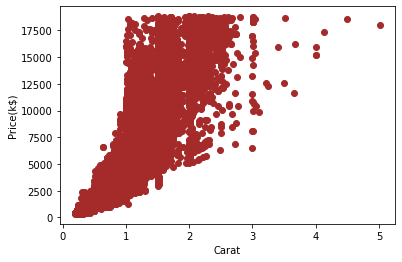

In [11]:
mpl.scatter(df.carat,df.price,color='brown')
mpl.xlabel('Carat')
mpl.ylabel('Price(k$)')
mpl.show()

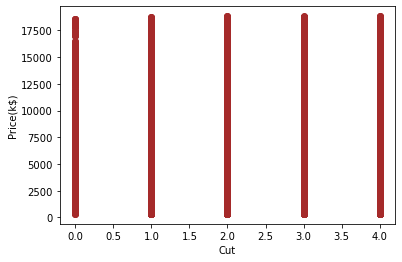

In [12]:
mpl.scatter(df.cut,df.price,color='brown')
mpl.xlabel('Cut')
mpl.ylabel('Price(k$)')
mpl.show()

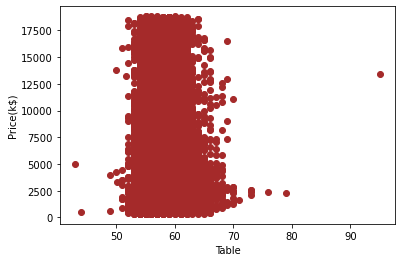

In [13]:
mpl.scatter(df.table,df.price,color='brown')
mpl.xlabel('Table')
mpl.ylabel('Price(k$)')
mpl.show()

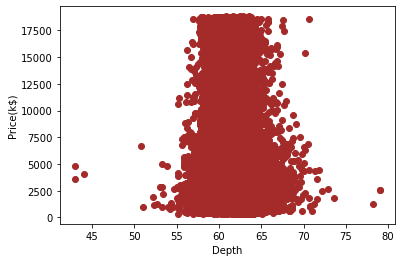

In [14]:
mpl.scatter(df.depth,df.price,color='brown')
mpl.xlabel('Depth')
mpl.ylabel('Price(k$)')
mpl.show()

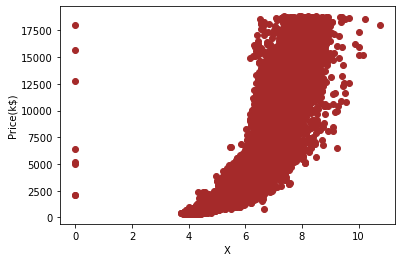

In [15]:
mpl.scatter(df.x,df.price,color='brown')
mpl.xlabel('X')
mpl.ylabel('Price(k$)')
mpl.show()

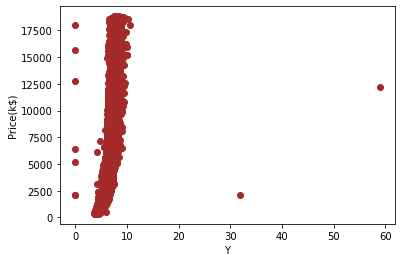

In [16]:
mpl.scatter(df.y,df.price,color='brown')
mpl.xlabel('Y')
mpl.ylabel('Price(k$)')
mpl.show()

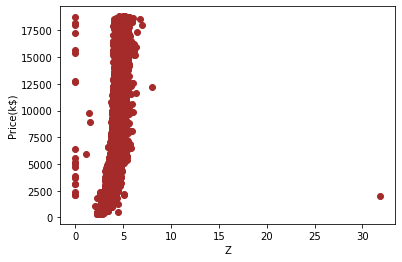

In [17]:
mpl.scatter(df.z,df.price,color='brown')
mpl.xlabel('Z')
mpl.ylabel('Price(k$)')
mpl.show()

# Create X & Y 

In [18]:
#Based on the observation of Plots and research about the important characteristics of diamond:
#I found the following combination suitable for X
#The best combination for Xdata is color-carat-clarity-x
x=np.asanyarray(df[['carat','clarity','color','x']]).astype(float)
x

array([[0.23, 3.  , 1.  , 3.95],
       [0.21, 2.  , 1.  , 3.89],
       [0.23, 4.  , 1.  , 4.05],
       ...,
       [0.71, 2.  , 1.  , 5.79],
       [0.71, 2.  , 2.  , 5.74],
       [0.7 , 5.  , 1.  , 5.71]])

In [19]:
y=np.asanyarray(df[['price']]).astype(float)
y

array([[ 326.],
       [ 326.],
       [ 327.],
       ...,
       [2756.],
       [2756.],
       [2757.]])

# Normalizing X & Y 

In [20]:
scaler=StandardScaler()

In [21]:
norm_x=scaler.fit(x).transform(x)
norm_x

array([[-1.19818918, -0.48423862, -0.93713127, -1.58788233],
       [-1.24038379, -1.06409309, -0.93713127, -1.64137165],
       [-1.19818918,  0.09561584, -0.93713127, -1.49873345],
       ...,
       [-0.18551847, -1.06409309, -0.93713127,  0.05245691],
       [-0.18551847, -1.06409309, -0.34926644,  0.00788248],
       [-0.20661578,  0.67547031, -0.93713127, -0.01886218]])

In [22]:
norm_y=scaler.fit(y).transform(y)
norm_y

array([[-0.90410171],
       [-0.90410171],
       [-0.90385104],
       ...,
       [-0.29497252],
       [-0.29497252],
       [-0.29472185]])

# Create Data's Train-Test 

In [23]:
x_train,x_test,y_train,y_test=tts(norm_x,norm_y,train_size=0.78,random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(42075, 4) (11868, 4) (42075, 1) (11868, 1)


# Modeling

In [24]:
#create model
reg=linear_model.LinearRegression()

In [25]:
#modeling
reg.fit(x_train,y_train)

LinearRegression()

### Predict Y 

In [26]:
#Predicted Y
y_hat=reg.predict(x_test)
#CorrectAnswer
y_ans=y_test

# Check The Accuracy of Model

In [27]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test, y_ans))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_ans)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_ans) ** 2))
print("R2-score: %.2f" % r2_score(y_ans , y_hat) )

Variance score: 0.88
Mean absolute error: 0.22
Residual sum of squares (MSE): 0.12
R2-score: 0.88


# As we can see, the accuracy of the model is almost high
# (MAE and MSE is almost Low,R2 and VS is almost High)

## Thank you for your support
## Author : HoomanKaseban
<a href='https://www.kaggle.com' target='_blank'>Dataset Source:kaggle</a>
### you can contact me through gmail,instagram,linkedin and github
#### Gmail:www.hoomankaseban@gmail.com
<ul>
<li><a href='https://www.instagram.com/hooman_kaseban' target='_blank'>my Instagram</a></li>
<li><a href='https://www.linkedin.com/in/hoomankaseban/' target='_blank'>my LinkedIn</a></li>
<li><a href='https://github.com/hoomankaseban' target='_blank'>my GitHub</a></li>
</ul>

#### Credit:All credits of this code are for Hooman Kaseban and are free for public use.
# The END